#### <font color='Green'>The data used can be found here [USA Police Shootings Data](https://www.kaggle.com/datasets/ramjasmaurya/us-police-shootings-from-20152022)</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')
# colors=['#097335','#030f4e','#f3dfb4','#bb840d','#cbf3e9']
# sns.set_palette(sns.color_palette(colors))

### Data loading

In [2]:
shootings_df = pd.read_csv('datasets/US Police shootings in from 2015-22.csv')
print(shootings_df.shape)
shootings_df.head(3)

(7682, 17)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True


In [3]:
# sampling 1000 data points and 6 features from the entire dataset randomly
shootings_df = shootings_df.sample(1000)
features = ['date', 'manner_of_death','armed', 'age', 'gender', 'state']
shootings_df = shootings_df[features]
shootings_df.shape

(1000, 6)

In [4]:
shootings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 4546 to 5855
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1000 non-null   object 
 1   manner_of_death  1000 non-null   object 
 2   armed            964 non-null    object 
 3   age              927 non-null    float64
 4   gender           997 non-null    object 
 5   state            1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 54.7+ KB


In [5]:
# missing values treatment
shootings_df['age'].fillna(shootings_df['age'].mean(), inplace=True)
shootings_df.fillna(method='ffill', inplace=True)

In [6]:
shootings_df.isna().any().sum()

0

In [7]:
# extracting year, month and day from column date
shootings_df['date'] = pd.to_datetime(shootings_df['date'])
shootings_df['year'] = shootings_df['date'].dt.year
shootings_df['month_name'] = shootings_df['date'].dt.month_name()
shootings_df['day_name'] = shootings_df['date'].dt.day_name()
shootings_df.head(3)

,date,manner_of_death,armed,age,gender,state,year,month_name,day_name
4546,2019-08-21,shot,unknown weapon,27.0,M,KY,2019,August,Wednesday
1900,2016-12-11,shot,unknown weapon,39.0,M,WV,2016,December,Sunday
4825,2019-12-02,shot,gun,21.0,M,FL,2019,December,Monday


In [8]:
# converting age to ints ie whole numbers
shootings_df['age'] = shootings_df['age'].astype('int64')

### Tufte's theory

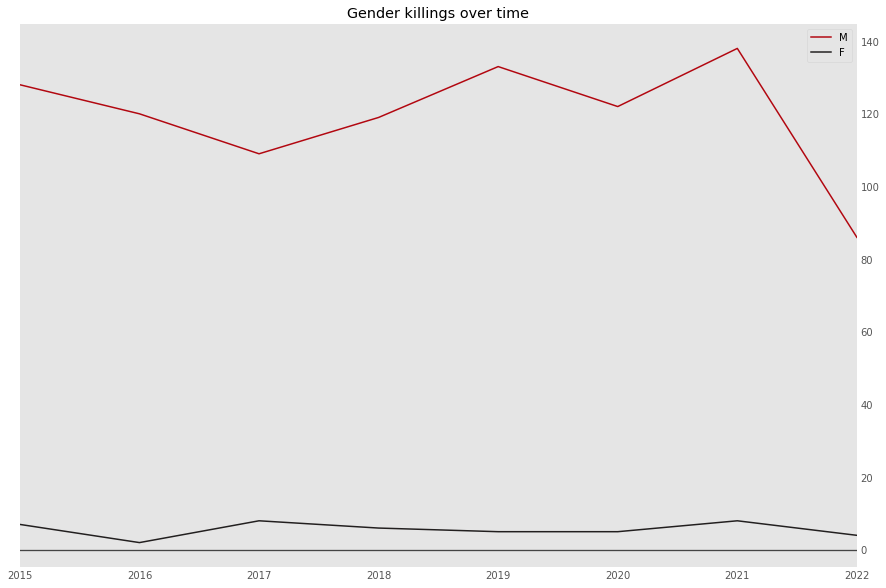

In [9]:

colors=['#b20710', '#221f1f']

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for i, gend in enumerate(shootings_df['gender'].value_counts().index):
    yr_gend = shootings_df[shootings_df['gender']==gend]['year'].value_counts().sort_index()
    ax.plot(yr_gend.index, yr_gend, color=colors[i], label=gend)

ax.yaxis.tick_right()
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)
ax.grid(False)
ax.set_xlim(2015, 2022)
plt.xticks(np.arange(2015, 2023, 1))

ax.set_title('Gender killings over time')
ax.legend()

ax.tick_params(axis=u'both', which=u'both',length=0)

### Colin's theory

Text(0.5, 1.0, 'Highest Killings by Month in 2016')

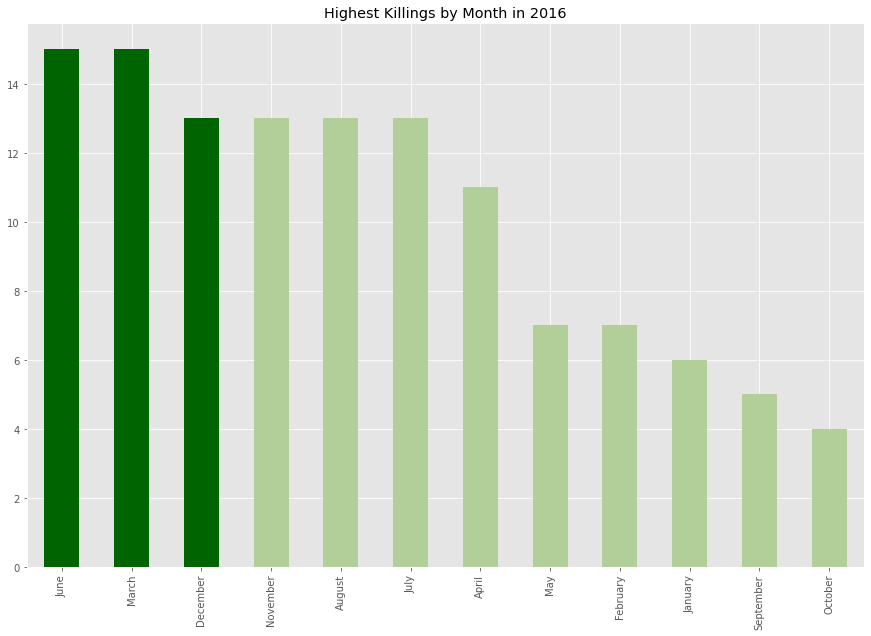

In [10]:
# 2016

y16_df = shootings_df[shootings_df['year'] == 2016]

color_map = ['#b3cf99' for _ in range(12)]
color_map[0] = color_map[1] = color_map[2] =  '#006400' 

fig, ax = plt.subplots(figsize=(15, 10))
y16_df['month_name'].value_counts().plot(kind='bar', color=color_map);
ax.set_title('Highest Killings by Month in 2016')


### Hypothesis

$h_0$ = Most police shootings happened in 2021

Text(0.95, 0.9, 'Shootings in 2021')

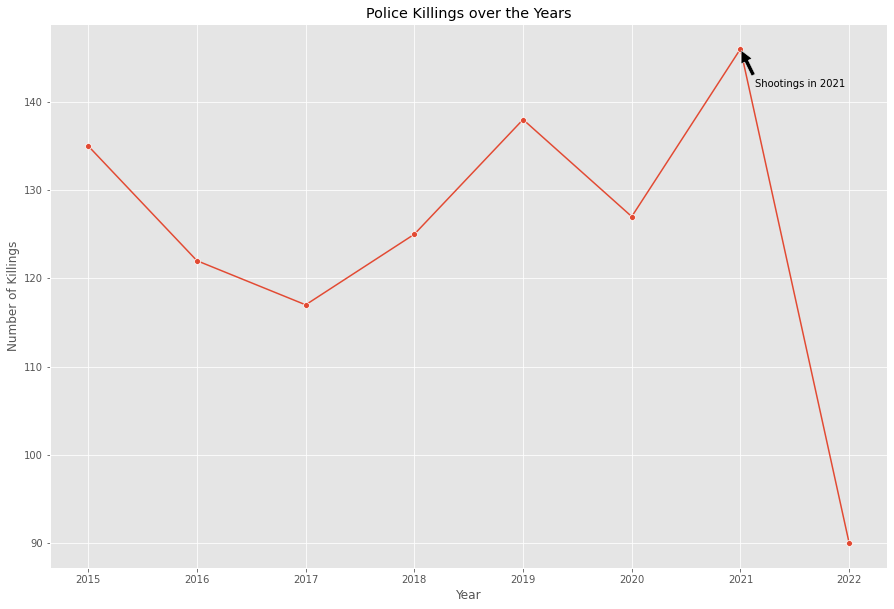

In [28]:

yr_df = shootings_df['year'].value_counts()

fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(yr_df.index, yr_df, marker='o')
ax.set_title('Police Killings over the Years')
ax.set_ylabel('Number of Killings')
ax.set_xlabel('Year')
ax.annotate('Shootings in 2021', xy=(2021, 146), xycoords='data', xytext=(0.95, 0.90), 
            textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

2021 did  have the highest, accept null hypothesis

### Aspects of the data

Is there particular months in which police shootings are highest?

Text(0.5, 1.0, 'Highest Killings by Month')

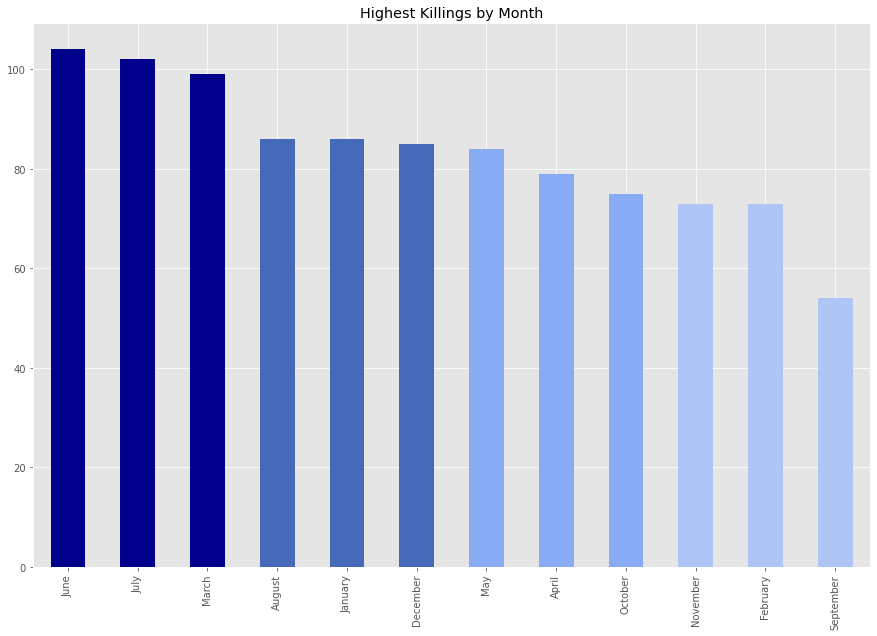

In [24]:
color_map = ['#AEC5F6' for _ in range(12)]
color_map[0] = color_map[1] = color_map[2] =  '#00008B' 
color_map[3] = color_map[4] = color_map[5] =  '#466AB7'
color_map[6] = color_map[7] = color_map[8] =  '#89ABF6'

fig, ax = plt.subplots(figsize=(15, 10))
shootings_df['month_name'].value_counts().plot(kind='bar', color=color_map)
ax.set_title('Highest Killings by Month')

Which states have the highest number of police shootings cases?

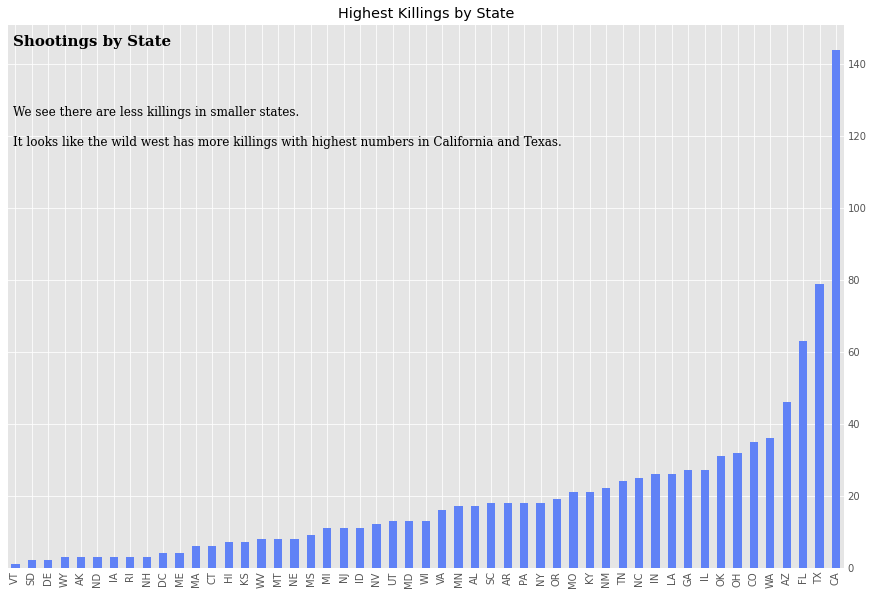

In [146]:
st_len = len(shootings_df['state'])
color_map = ['#6082F6' for _ in range(st_len)]
color_map[-1] = color_map[-2] = color_map[-3] =  '#3F0353' 

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
shootings_df['state'].value_counts(ascending=True).plot(kind='bar', color=color_map)

ax.set_title('Highest Killings by State')

ax.yaxis.tick_right()

fig.text(0.13, 0.85, 'Shootings by State', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.69, 
'''We see there are less killings in smaller states.

It looks like the wild west has more killings with highest numbers in California and Texas.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

ax.tick_params(axis=u'both', which=u'both',length=0)
